In [222]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

%matplotlib inline

In [223]:
# Read data from the CSV into a dataframe
path_prefix='data/season-'
raw_data_1 = pd.read_csv(path_prefix +'0102.csv')
raw_data_2 = pd.read_csv(path_prefix +'0203.csv')
raw_data_3 = pd.read_csv(path_prefix +'0304.csv')
raw_data_4 = pd.read_csv(path_prefix +'0405.csv')
raw_data_5 = pd.read_csv(path_prefix +'0506.csv')
raw_data_6 = pd.read_csv(path_prefix +'0607.csv')
raw_data_7 = pd.read_csv(path_prefix +'0708.csv')
raw_data_8 = pd.read_csv(path_prefix +'0809.csv')
raw_data_9 = pd.read_csv(path_prefix +'0910.csv')
raw_data_10 = pd.read_csv(path_prefix +'1011.csv')
raw_data_11 = pd.read_csv(path_prefix +'1112.csv')
raw_data_12 = pd.read_csv(path_prefix +'1213.csv')
raw_data_13 = pd.read_csv(path_prefix +'1314.csv')
raw_data_14 = pd.read_csv(path_prefix +'1415.csv')
raw_data_15 = pd.read_csv(path_prefix +'1516.csv')
raw_data_16 = pd.read_csv(path_prefix +'1617.csv')
raw_data_17 = pd.read_csv(path_prefix +'1718.csv')
raw_data_18 = pd.read_csv(path_prefix +'1819.csv')

In [224]:
columns_req = ['Date','HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','HST', 'AS', 'AST', 'HC', 'AC']
playing_statistics_1 = raw_data_1[columns_req]                      
playing_statistics_2 = raw_data_2[columns_req]
playing_statistics_3 = raw_data_3[columns_req]
playing_statistics_4 = raw_data_4[columns_req]
playing_statistics_5 = raw_data_5[columns_req]
playing_statistics_6 = raw_data_6[columns_req]
playing_statistics_7 = raw_data_7[columns_req]
playing_statistics_8 = raw_data_8[columns_req]
playing_statistics_9 = raw_data_9[columns_req]
playing_statistics_10 = raw_data_10[columns_req]
playing_statistics_11 = raw_data_11[columns_req]   
playing_statistics_12 = raw_data_12[columns_req]
playing_statistics_13 = raw_data_13[columns_req]
playing_statistics_14 = raw_data_14[columns_req]
playing_statistics_15 = raw_data_15[columns_req]
playing_statistics_16 = raw_data_16[columns_req]
playing_statistics_17 = raw_data_17[columns_req]
playing_statistics_18 = raw_data_18[columns_req]

In [251]:

def get_shots_made(playing_stat):
    # Create a dictionary with team names as keys
    teams = {key: [0] for key in playing_stat['HomeTeam'].unique()}
    
    for index, row in playing_stat.iterrows():
        HTS = row['HST']
        ATS = row['AST']
        teams[row.HomeTeam].append(HTS)
        teams[row.AwayTeam].append(ATS)

    df = pd.DataFrame(teams)
    for index, row in df.iterrows():
        if(index < 38):
            df.loc[index+1] = df.loc[index]+df.loc[index+1]          
    return df

def get_shots_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {key: [0] for key in playing_stat['HomeTeam'].unique()}
    
    for index, row in playing_stat.iterrows():
        HTSC = row['AST']
        ATSC = row['HST']
        teams[row.HomeTeam].append(HTSC)
        teams[row.AwayTeam].append(ATSC)

    df = pd.DataFrame(teams)
    for index, row in df.iterrows():
        if(index < 38):
            df.loc[index+1] = df.loc[index]+df.loc[index+1]         
    return df

def load_shots_until_gameweek(dframe):
    df = dframe.copy()
    df['HTSM'] = 0
    df['ATSM'] = 0
    df['HTSC'] = 0
    df['ATSC'] = 0
    
    teams = df['HomeTeam'].unique()
    team_scored = {team: [] for team in teams}
    team_conceded = {team: [] for team in teams}
    goal_scored = get_shots_made(df)
    goal_conceded = get_shots_conceded(df)
    
    for index, row in df.iterrows():
        ht = row.HomeTeam
        at = row.AwayTeam
        htgs = list(goal_scored[ht]) if len(team_scored[ht]) == 0 else team_scored[ht]
        atgs = list(goal_scored[at]) if len(team_scored[at]) == 0 else team_scored[at]
        htgc = list(goal_conceded[ht]) if len(team_conceded[ht]) == 0 else team_conceded[ht]
        atgc = list(goal_conceded[at]) if len(team_conceded[at]) == 0 else team_conceded[at] 
        
        htgsv = silent_pop(htgs)
        atgsv = silent_pop(atgs)
        htgcv = silent_pop(htgc)
        atgcv = silent_pop(atgc)
        
        df.loc[index, 'HTSM'] = htgsv
        df.loc[index, 'ATSM'] = atgsv
        df.loc[index, 'HTSC'] = htgcv
        df.loc[index, 'ATSC'] = atgcv
        
        team_scored[ht] = htgs
        team_scored[at] = atgs
        team_conceded[ht] = htgc
        team_conceded[at] = atgc
        
    return df

def silent_pop(list):
    return list.pop(0)

shots_loaded_data_1 = load_shots_until_gameweek(playing_statistics_1)
shots_loaded_data_2 = load_shots_until_gameweek(playing_statistics_2)
shots_loaded_data_3 = load_shots_until_gameweek(playing_statistics_3)
shots_loaded_data_4 = load_shots_until_gameweek(playing_statistics_4)
shots_loaded_data_5 = load_shots_until_gameweek(playing_statistics_5)
shots_loaded_data_6 = load_shots_until_gameweek(playing_statistics_6)
shots_loaded_data_7 = load_shots_until_gameweek(playing_statistics_7)
shots_loaded_data_8 = load_shots_until_gameweek(playing_statistics_8)
shots_loaded_data_9 = load_shots_until_gameweek(playing_statistics_9)
shots_loaded_data_10 = load_shots_until_gameweek(playing_statistics_10)
shots_loaded_data_11= load_shots_until_gameweek(playing_statistics_11)
shots_loaded_data_12= load_shots_until_gameweek(playing_statistics_12)
shots_loaded_data_13= load_shots_until_gameweek(playing_statistics_13)
shots_loaded_data_14= load_shots_until_gameweek(playing_statistics_14)
shots_loaded_data_15= load_shots_until_gameweek(playing_statistics_15)
shots_loaded_data_16= load_shots_until_gameweek(playing_statistics_16)
shots_loaded_data_17= load_shots_until_gameweek(playing_statistics_17)
shots_loaded_data_18= load_shots_until_gameweek(playing_statistics_18)

In [252]:

def get_goals_scored(playing_stat):
    # Create a dictionary with team names as keys
    teams = {key: [0] for key in playing_stat['HomeTeam'].unique()}
    
    for index, row in playing_stat.iterrows():
        HTGS = row['FTHG']
        ATGS = row['FTAG']
        teams[row.HomeTeam].append(HTGS)
        teams[row.AwayTeam].append(ATGS)

    df = pd.DataFrame(teams)
    for index, row in df.iterrows():
        if(index < 38):
            df.loc[index+1] = df.loc[index]+df.loc[index+1]          
    return df

def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {key: [0] for key in playing_stat['HomeTeam'].unique()}
    
    for index, row in playing_stat.iterrows():
        HTGC = row['FTAG']
        ATGC = row['FTHG']
        teams[row.HomeTeam].append(HTGC)
        teams[row.AwayTeam].append(ATGC)

    df = pd.DataFrame(teams)
    for index, row in df.iterrows():
        if(index < 38):
            df.loc[index+1] = df.loc[index]+df.loc[index+1]         
    return df

def load_goals_until_gameweek(dframe):
    df = dframe.copy()
    df['HTAGS'] = 0
    df['ATAGS'] = 0
    df['HTAGC'] = 0
    df['ATAGC'] = 0
    
    teams = df['HomeTeam'].unique()
    team_scored = {team: [] for team in teams}
    team_conceded = {team: [] for team in teams}
    goal_scored = get_goals_scored(df)
    goal_conceded = get_goals_conceded(df)
    
    for index, row in df.iterrows():
        ht = row.HomeTeam
        at = row.AwayTeam
        htgs = list(goal_scored[ht]) if len(team_scored[ht]) == 0 else team_scored[ht]
        atgs = list(goal_scored[at]) if len(team_scored[at]) == 0 else team_scored[at]
        htgc = list(goal_conceded[ht]) if len(team_conceded[ht]) == 0 else team_conceded[ht]
        atgc = list(goal_conceded[at]) if len(team_conceded[at]) == 0 else team_conceded[at] 
        
        htgsv = silent_pop(htgs)
        atgsv = silent_pop(atgs)
        htgcv = silent_pop(htgc)
        atgcv = silent_pop(atgc)
        
        df.loc[index, 'HTAGS'] = htgsv
        df.loc[index, 'ATAGS'] = atgsv
        df.loc[index, 'HTAGC'] = htgcv
        df.loc[index, 'ATAGC'] = atgcv
        
        team_scored[ht] = htgs
        team_scored[at] = atgs
        team_conceded[ht] = htgc
        team_conceded[at] = atgc
        
    return df

goals_loaded_data_1 = load_goals_until_gameweek(shots_loaded_data_1)
goals_loaded_data_2 = load_goals_until_gameweek(shots_loaded_data_2)
goals_loaded_data_3 = load_goals_until_gameweek(shots_loaded_data_3)
goals_loaded_data_4 = load_goals_until_gameweek(shots_loaded_data_4)
goals_loaded_data_5 = load_goals_until_gameweek(shots_loaded_data_5)
goals_loaded_data_6 = load_goals_until_gameweek(shots_loaded_data_6)
goals_loaded_data_7 = load_goals_until_gameweek(shots_loaded_data_7)
goals_loaded_data_8 = load_goals_until_gameweek(shots_loaded_data_8)
goals_loaded_data_9 = load_goals_until_gameweek(shots_loaded_data_9)
goals_loaded_data_10 = load_goals_until_gameweek(shots_loaded_data_10)
goals_loaded_data_11= load_goals_until_gameweek(shots_loaded_data_11)
goals_loaded_data_12= load_goals_until_gameweek(shots_loaded_data_12)
goals_loaded_data_13= load_goals_until_gameweek(shots_loaded_data_13)
goals_loaded_data_14= load_goals_until_gameweek(shots_loaded_data_14)
goals_loaded_data_15= load_goals_until_gameweek(shots_loaded_data_15)
goals_loaded_data_16= load_goals_until_gameweek(shots_loaded_data_16)
goals_loaded_data_17= load_goals_until_gameweek(shots_loaded_data_17)
goals_loaded_data_18= load_goals_until_gameweek(shots_loaded_data_18)

In [263]:

def get_points(playing_stat):
    # Create a dictionary with team names as keys
    all_teams = playing_stat['HomeTeam'].unique()
    teams_points = {key: [0] for key in all_teams}
    team_w_streak = {key: [0] for key in all_teams}
   
    for index, row in playing_stat.iterrows():
        res = row.FTR
        HTP = convert_to_points(res, 'H')
        ATP = convert_to_points(res, 'A')
        teams_points[row.HomeTeam].append(HTP)
        teams_points[row.AwayTeam].append(ATP)  

    df = pd.DataFrame(teams_points)
    for index, row in df.iterrows():
        if(index < 38):
            df.loc[index+1] = df.loc[index]+df.loc[index+1]          
    return df

def get_streaks(stat):
    # Create a dictionary with team names as keys
    all_teams = stat['HomeTeam'].unique()
    team_w_streak = {key: [0] for key in all_teams}
   
    for index, row in stat.iterrows():
        h_streaks = team_w_streak[row.HomeTeam]
        a_streaks = team_w_streak[row.AwayTeam]
        
        res = row.FTR
        HTS = 0 if res != 'H' else h_streaks[-1] + 1
        ATS = 0 if res != 'A' else a_streaks[-1] + 1
        
        team_w_streak[row.HomeTeam].append(HTS)
        team_w_streak[row.AwayTeam].append(ATS)  
     
    return pd.DataFrame(team_w_streak)

def convert_to_points(result, team):
    if result == 'D':
        return 1
    elif result == team:
        return 3
    else:
        return 0

def load_points_until_gameweek(dframe):
    df = dframe.copy()
    df['HTAP'] = 0
    df['ATAP'] = 0
    
    teams = df['HomeTeam'].unique()
    team_points = {team: [] for team in teams}
    team_streaks = {team: [] for team in teams}
    points = get_points(df)
    streaks = get_streaks(df)
    
    
    for index, row in df.iterrows():
        ht = row.HomeTeam
        at = row.AwayTeam
        htp = list(points[ht]) if len(team_points[ht]) == 0 else team_points[ht]
        atp = list(points[at]) if len(team_points[at]) == 0 else team_points[at]
        
        hts = list(streaks[ht]) if len(team_streaks[ht]) == 0 else team_streaks[ht]
        ats = list(streaks[at]) if len(team_streaks[at]) == 0 else team_streaks[at]
        
        htpv = silent_pop(htp)
        atpv = silent_pop(atp)
        
        htsv = silent_pop(hts)
        atsv = silent_pop(ats)
        
        df.loc[index, 'HTAP'] = htpv
        df.loc[index, 'ATAP'] = atpv
        df.loc[index, 'HTWS'] = htsv
        df.loc[index, 'ATWS'] = atsv
        
        team_points[ht] = htp
        team_points[at] = atp
        team_streaks[ht] = hts
        team_streaks[at] = ats
        
    return df

points_loaded_data_1 = load_points_until_gameweek(goals_loaded_data_1)
points_loaded_data_2 = load_points_until_gameweek(goals_loaded_data_2)
points_loaded_data_3 = load_points_until_gameweek(goals_loaded_data_3)
points_loaded_data_4 = load_points_until_gameweek(goals_loaded_data_4)
points_loaded_data_5 = load_points_until_gameweek(goals_loaded_data_5)
points_loaded_data_6 = load_points_until_gameweek(goals_loaded_data_6)
points_loaded_data_7 = load_points_until_gameweek(goals_loaded_data_7)
points_loaded_data_8 = load_points_until_gameweek(goals_loaded_data_8)
points_loaded_data_9 = load_points_until_gameweek(goals_loaded_data_9)
points_loaded_data_10 = load_points_until_gameweek(goals_loaded_data_10)
points_loaded_data_11= load_points_until_gameweek(goals_loaded_data_11)
points_loaded_data_12= load_points_until_gameweek(goals_loaded_data_12)
points_loaded_data_13= load_points_until_gameweek(goals_loaded_data_13)
points_loaded_data_14= load_points_until_gameweek(goals_loaded_data_14)
points_loaded_data_15= load_points_until_gameweek(goals_loaded_data_15)
points_loaded_data_16= load_points_until_gameweek(goals_loaded_data_16)
points_loaded_data_17= load_points_until_gameweek(goals_loaded_data_17)
points_loaded_data_18= load_points_until_gameweek(goals_loaded_data_18)
points_loaded_data_18

,Date,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,HST,AS,AST,...,HTSC,ATSC,HTAGS,ATAGS,HTAGC,ATAGC,HTAP,ATAP,HTWS,ATWS
0,10/08/2018,Man United,Leicester,H,2,1,8,6,13,4,...,0,0,0,0,0,0,0,0,0.0,0.0
1,11/08/2018,Bournemouth,Cardiff,H,2,0,12,4,10,1,...,0,0,0,0,0,0,0,0,0.0,0.0
2,11/08/2018,Fulham,Crystal Palace,A,0,2,15,6,10,9,...,0,0,0,0,0,0,0,0,0.0,0.0
3,11/08/2018,Huddersfield,Chelsea,A,0,3,6,1,13,4,...,0,0,0,0,0,0,0,0,0.0,0.0
4,11/08/2018,Newcastle,Tottenham,A,1,2,15,2,15,5,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,12/05/2019,Liverpool,Wolves,H,2,0,13,5,7,2,...,95,143,87,47,22,44,94,57,8.0,3.0
376,12/05/2019,Man United,Cardiff,A,0,2,26,10,13,4,...,169,202,65,32,52,69,66,31,0.0,0.0
377,12/05/2019,Southampton,Huddersfield,D,1,1,10,3,10,3,...,176,188,44,21,64,75,38,15,0.0,0.0
378,12/05/2019,Tottenham,Everton,D,2,2,11,3,17,9,...,150,134,65,52,37,44,70,53,0.0,1.0


In [264]:
combined_df = pd.concat([points_loaded_data_1,
                          points_loaded_data_2,
                          points_loaded_data_3,
                          points_loaded_data_4,
                          points_loaded_data_5,
                          points_loaded_data_6,
                          points_loaded_data_7,
                          points_loaded_data_8,
                          points_loaded_data_9,
                          points_loaded_data_10,
                          points_loaded_data_11,
                          points_loaded_data_12,
                          points_loaded_data_13,
                          points_loaded_data_14,
                          points_loaded_data_15,
                          points_loaded_data_16,
                          points_loaded_data_17,
                          points_loaded_data_18
                          ], ignore_index=True)


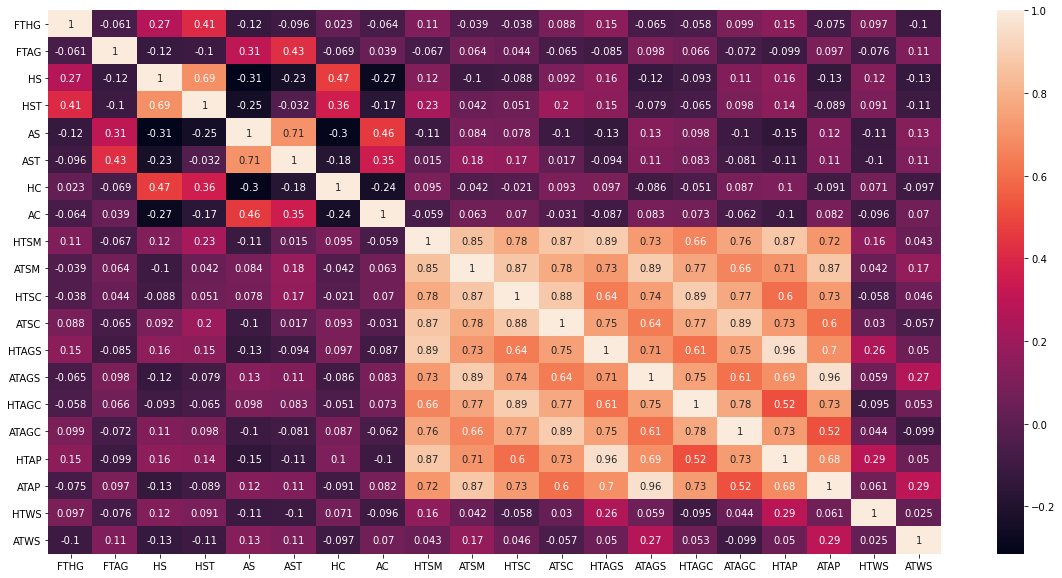

In [275]:
plt.figure(figsize=(20,10)) 
sns.heatmap(combined_df.corr(), annot= True)

In [278]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
df = combined_df.copy().drop(columns=['Date', 'HomeTeam', 'AwayTeam', 'HS', 'AS', 'HST', 'AST', 'FTHG', 'FTAG', 'HC', 'AC'])
data = df[~df[df.columns[1:]].isin((0, 0.0)).all(axis=1)]
X_all = data.drop(['FTR'],1)
y_all = data['FTR']
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.3,
                                                    random_state = 2,
                                                    stratify = y_all)

X_all

,HTSM,ATSM,HTSC,ATSC,HTAGS,ATAGS,HTAGC,ATAGC,HTAP,ATAP,HTWS,ATWS
10,9,2,4,2,2,0,1,0,3,1,1.0,0.0
11,9,6,2,6,4,2,0,0,3,3,1.0,1.0
12,8,2,1,9,5,0,0,4,3,0,1.0,0.0
13,4,3,6,4,0,2,1,1,0,3,0.0,1.0
14,4,6,3,5,1,3,2,2,0,3,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6835,221,149,95,143,87,47,22,44,94,57,8.0,3.0
6836,215,122,169,202,65,32,52,69,66,31,0.0,0.0
6837,159,115,176,188,44,21,64,75,38,15,0.0,0.0
6838,186,160,150,134,65,52,37,44,70,53,0.0,1.0


              precision    recall  f1-score   support

           A       0.46      0.40      0.43       566
           D       0.28      0.06      0.10       503
           H       0.55      0.82      0.66       930

    accuracy                           0.51      1999
   macro avg       0.43      0.43      0.40      1999
weighted avg       0.46      0.51      0.45      1999



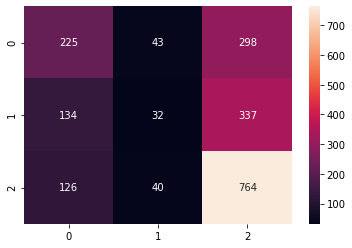

In [279]:
#fitting the RANDOM FOREST to the training se
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')
print(classification_report(y_test, Y_pred))